# 在小数据集上训练神经网络
这个数据集包含 25 000 张猫狗图像（每个类别都有 12 500 张）。
下载数据并解压之后，你需要创建一个新数据集，其中包含三个子集：每个类别各 1000 个样本
的训练集、每个类别各 500 个样本的验证集和每个类别各 500 个样本的测试集。

In [2]:
import os, shutil

In [13]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'D:\\mldata\\catdogs\\train'
# original_dataset_dir = '/home/lys/aidata/catdogs/train'  # for linux OS

# 删除一个目录，包含目录里所有东西
def removeDir(dirPath):
    if not os.path.isdir(dirPath):
        return
    files = os.listdir(dirPath)
    try:
        for file in files:
            filePath = os.path.join(dirPath, file)
            if os.path.isfile(filePath):
                os.remove(filePath)
            elif os.path.isdir(filePath):
                removeDir(filePath)
        os.rmdir(dirPath)
    except Exception as e:
        print(e)

# The directory where we will
# store our smaller dataset
base_dir = 'D:\\mldata\\catdogs\\newdir'
# base_dir = '/home/lys/aidata/catdogs/newdir'  # for linux OS
if os.path.exists(base_dir):
    print("Info: base_dir exists, delete now.")
    removeDir(base_dir)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

base_dir exists, delete now.


检查各个数据集的数量是否正确，直接读取目录文件个数：

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [15]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [16]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [17]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [18]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [19]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


每个分类的数据完整，各有1000训练样本，500验证样本，500测试样本。这是一个平衡的二分类问题，分类精度可做为衡量成功的指标。

## 构建网络

网络由卷积层（用relu激活）和池化层交替堆叠组成。  
这里要出处理更大的图像和更复杂的问题，所以需要响应增加网络容量。即增加卷积层与池化层。  
网络中特征图的深度在逐渐增大（从32增大到128），而特征图的尺寸在逐渐减小（从150*150减小到7*7）

In [20]:
# 将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


查看特征图的维度怎样随着层变化：

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

在编译这一步，和前面一样，我们将使用 RMSprop优化器。  
网络最后一层是单一sigmoid单元，所以我们将使用二元交叉熵作为损失函数
## 配置模型

In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

## 数据预处理
图像应该被转化为浮点数张量。
* 读取图像
* 将jpg文件解码为RGB像素矩阵
* 将RGB像素矩阵转为话浮点张量
* 将像素值（0~255）缩放到[0,1]区间，网络处理小浮点型比较好。

In [53]:
from keras.preprocessing.image import ImageDataGenerator

# IImageDataGenerator 类，可以快速创建 Python 生成器，能够将图像文件自动转换为预处理好的张量批量
# 重放缩因子，所有图片都会按缩放因子（1./255）进行缩放
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        # 目标文件夹
        train_dir,
        # 所有图片调整成 150x150
        target_size=(150, 150),
        batch_size=20,
        # 因为使用了 binary_crossentropy损失，所以需要用二进制标签
        class_mode='binary')
print(type(train_generator))   # keras_preprocessing.image.DirectoryIterator类型
print(train_generator.image_shape) # (150, 150, 3)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
<class 'keras_preprocessing.image.DirectoryIterator'>
(150, 150, 3)
Found 1000 images belonging to 2 classes.


其中一个生成器的输出：它生成了 150×150 的 RGB 图像［形状为 (20, 150, 150, 3)］与二进制标签［形状为 (20,)］组成的批量。  
每个批量中包含 20 个样本（批量大小）。注意，生成器会不停地生成这些批量，它会不断循环目标文件夹中的图像。因此，你
需要在某个时刻终止（break）迭代循环。  
<font color='green'>flow_from_directory</font>:  这个函数很奇特，需要注意它的用法，它的第一个参数传入一个目录，该目录里必须放各个分类的子目录。每个子目录放自己类别的图片。该函数按照每个子目录的生成不同的标签数值（这就是为什么原始数据集并不需要额外的标签数据集的原因）

In [56]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('第一条数据',data_batch[0])  # 形状为(150, 150, 3)
    print('第一条标签',labels_batch[0]) # 根据所在的子目录（类别）会输出1.0, 0.0....可以想见，如果有多个子目录会自动排下去
    break

data batch shape: (2000, 150, 150, 3)
labels batch shape: (2000,)
第一条数据 [[[0.2392157  0.32156864 0.16862746]
  [0.16470589 0.22352943 0.09411766]
  [0.16470589 0.21568629 0.09803922]
  ...
  [0.20392159 0.41960788 0.15294118]
  [0.16078432 0.3803922  0.10196079]
  [0.16078432 0.3803922  0.08627451]]

 [[0.28235295 0.36862746 0.21960786]
  [0.25882354 0.3372549  0.20000002]
  [0.20000002 0.26666668 0.14117648]
  ...
  [0.29803923 0.49803925 0.227451  ]
  [0.21568629 0.4156863  0.14509805]
  [0.17254902 0.37647063 0.09411766]]

 [[0.21960786 0.32941177 0.18039216]
  [0.32156864 0.4156863  0.27450982]
  [0.31764707 0.40000004 0.27058825]
  ...
  [0.14117648 0.3254902  0.05882353]
  [0.1764706  0.36078432 0.09411766]
  [0.27058825 0.454902   0.18039216]]

 ...

 [[0.48235297 0.52156866 0.31764707]
  [0.69411767 0.74509805 0.5372549 ]
  [0.5529412  0.60784316 0.40000004]
  ...
  [0.7843138  0.8000001  0.654902  ]
  [0.60784316 0.627451   0.47058827]
  [0.5686275  0.6        0.43921572]]

 [

* 使用 fit_generator 方法来拟合，它在数据生成器上的效果和fit相同。
* 它的第一个参数应该是一个 Python 生成器，可以不停地生成输入和目标组成的批量。
* steps_per_epoch 参数的作用：从生成器中抽取 steps_per_epoch 个批量后（即运行了 steps_per_epoch 次梯度下降），拟合过程将进入下一个轮次。
* 本例中，每个批量包含 20 个样本，所以读取完所有 2000 个样本需要 100个批量。

In [35]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 212s 2s/step - loss: 0.6751 - acc: 0.5842 - val_loss: 0.6454 - val_acc: 0.6350
Epoch 2/30
100/100 [==============================] - 212s 2s/step - loss: 0.6056 - acc: 0.6740 - val_loss: 0.6342 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 271s 3s/step - loss: 0.5465 - acc: 0.7163 - val_loss: 0.6216 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 212s 2s/step - loss: 0.5062 - acc: 0.7585 - val_loss: 0.5818 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 212s 2s/step - loss: 0.4789 - acc: 0.7677 - val_loss: 0.6050 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 214s 2s/step - loss: 0.4452 - acc: 0.7910 - val_loss: 0.5829 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 212s 2s/step - loss: 0.4111 - acc: 0.8125 - val_loss: 0.6271 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 213s 2s/step - 

及时保存模型总是极好的。

In [37]:
model.save('cats_and_dogs_small_1.h5')

绘制训练过程中，分别在训练集和验证集上的精度与损失：

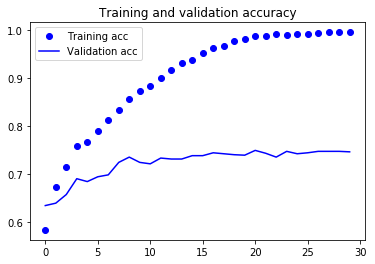

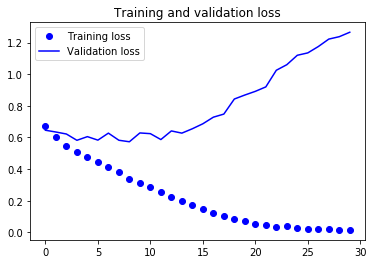

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

从这些图像中都能看出过拟合的特征。因为训练样本相对较少（2000 个），所以过拟合是你最关心的问题。现在我们将使用一种针对于计算
机视觉领域的新方法，在用深度学习模型处理图像时几乎都会用到这种方法，它就是数据增强（data augmentation）。

## 使用数据增强

过拟合的原因是学习样本太少，导致无法训练出能够泛化到新数据的模型。如果有无穷多数据，那么模型能观察到数据分布的所有规律，这样永远都不会过拟合。
数据增强是从现有少量训练样本生成更多样本。
* 其方法是利用多种能够生成可信图像的随机变换来增加样本。
* 其目标是，模型在训练时不会两次查看完全相同的图像。这让模型能够观察到数据的更多内容，从而具有更好的泛化能力。
* 在 Keras 中，这可以通过对 ImageDataGenerator 实例读取的图像执行多次随机变换来实现。

In [60]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

介绍一下这个函数的几个重要参数

* rotation_range 是角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
* width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽度或总高度的比例）。
* shear_range 是随机错切变换的角度。
* zoom_range 是图像随机缩放的范围。
* horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真实世界的图像），这种做法是有意义的。
* fill_mode是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移

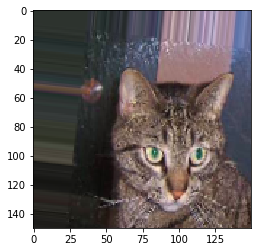

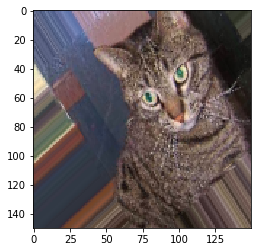

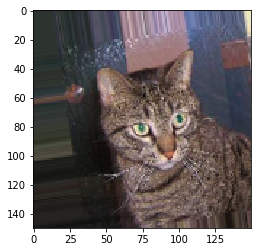

In [71]:
# 显示几个随机增强后的训练图像
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[1]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# 生成随机变换后的图像批量。循环是无限的，因此需要在某个时刻终止循环
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break

plt.show()

使用这种数据增强来训练一个新网络，那么网络将不会两次看到同样的输入。但网络看到的输入仍然是高度相关的，因为这些输入都来自于少量的原始图像。所以无法生成新信息，而只能混合现有信息。  
因此，这种方法可能不足以完全消除过拟合。为了进一步降低过拟合，我们还需要向模型中添加一个 Dropout 层，添加到密集连接分类器之前。

In [72]:
# 定义一个包含 dropout 的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),  # 1e-4  =  1* 10的负四次方
              metrics=['acc'])

我们来训练这个使用了数据增强和 dropout 的网络:

In [74]:
# 增强训练集
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 验证集没必要也不能增强
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 105s 1s/step - loss: 0.6852 - acc: 0.5362 - val_loss: 0.6682 - val_acc: 0.6022
Epoch 2/100
100/100 [==============================] - 106s 1s/step - loss: 0.6679 - acc: 0.5850 - val_loss: 0.6526 - val_acc: 0.6179
Epoch 3/100
100/100 [==============================] - 107s 1s/step - loss: 0.6583 - acc: 0.6112 - val_loss: 0.6476 - val_acc: 0.6104
Epoch 4/100
100/100 [==============================] - 111s 1s/step - loss: 0.6384 - acc: 0.6266 - val_loss: 0.5996 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 118s 1s/step - loss: 0.6185 - acc: 0.6569 - val_loss: 0.5945 - val_acc: 0.6751
Epoch 6/100
100/100 [==============================] - 117s 1s/step - loss: 0.6206 - acc: 0.6431 - val_loss: 0.6147 - val_acc: 0.6353
Epoch 7/100
100/100 [==============================] - 115s 1s/step - loss: 0.5939 - acc: 0.6881 - val_loss: 0.5

KeyboardInterrupt: 

Let's save our model -- we will be using it in the section on convnet visualization.

In [41]:
model.save('cats_and_dogs_small_2.h5')

Let's plot our results again:

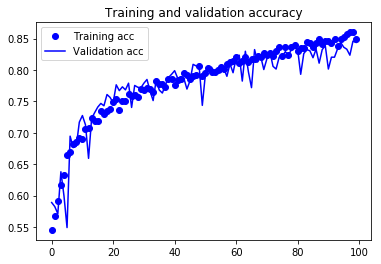

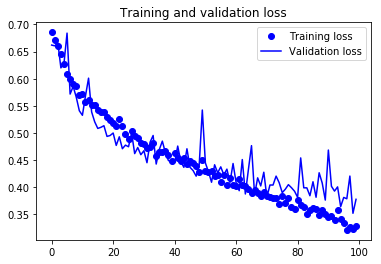

In [43]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

使用了数据增强和 dropout 之后，模型不再过拟合：
训练曲线紧紧跟随着验证曲线。现在的精度为 82%，比未正则化的模型提高了 15%（相对比例）